# Advanced Machine Learning

## Information, Entropy, Probability

Information provides a way to quantify the amount of surprise for an event measured in bits.

Entropy provides a measure of the average amount of information needed to represent an event drawn from a probability distribution for a random variable.

Reference: https://machinelearningmastery.com/what-is-information-entropy/

In [12]:
from math import log2
from matplotlib import pyplot
%matplotlib inline

### Coin Flips

In [7]:
# calculate the information for a coin toss 

# probability of the event
p = 0.5
# calculate information for event
h = -log2(p)

print('p(x)=%.3f, information: %.3f bits' % (p, h))

p(x)=0.500, information: 1.000 bits


If the same coin was flipped n times, then the information for this sequence of flips would be n bits. If the coin was not fair and the probability of a head was instead 10% (0.1), then the event would be more rare and would require more than 3 bits of information.

In [16]:
# probability of the event
p = 0.1
# calculate information for event
h = -log2(p)

print('p(x)=%.3f, information: %.3f bits' % (p, h))

p(x)=0.100, information: 3.322 bits


In [5]:
# calculate the information for a dice roll

# probability of the event
p = 1.0 / 6.0
# calculate information for event
h = -log2(p)

print('p(x)=%.3f, information: %.3f bits' % (p, h))

p(x)=0.167, information: 2.585 bits


- Low Probability Event: High Information (surprising)
- High Probability Event: Low Information (unsurprising)

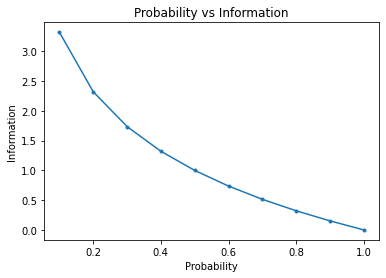

In [6]:
# list of probabilities
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# calculate information
info = [-log2(p) for p in probs]

# plot probability vs information
pyplot.plot(probs, info, marker='.')
pyplot.title('Probability vs Information')
pyplot.xlabel('Probability')
pyplot.ylabel('Information')
pyplot.show()

### Entropy

Entropy is the number of bits required to represent a randomly drawn even from the distribution, e.g. an average event. We can explore this for a simple distribution with two events, like a coin flip, but explore different probabilities for these two events and calculate the entropy for each.

- Skewed Probability Distribution (unsurprising): Low entropy.

- Balanced Probability Distribution (surprising): High entropy.

Calculating the entropy for a random variable provides the basis for other measures such as mutual information (information gain).

Entropy also provides the basis for calculating the difference between two probability distributions with cross-entropy and the KL-divergence.

In [9]:
# calculate the entropy for a dice roll

# the number of events
n = 6

# probability of one event
p = 1.0 /n

# calculate entropy
entropy = -sum([p * log2(p) for _ in range(n)])

print('entropy: %.3f bits' % entropy)

entropy: 2.585 bits


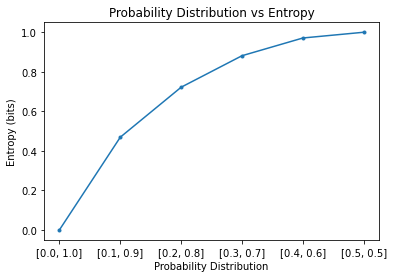

In [15]:
#compare probability distributions vs entropy

# calculate entropy
def entropy(events, ets=1e-15):
    return -sum([p * log2(p + ets) for p in events])
 
# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# create probability distribution
dists = [[p, 1.0 - p] for p in probs]

# calculate entropy for each distribution
ents = [entropy(d) for d in dists]

# plot probability distribution vs entropy
pyplot.plot(probs, ents, marker='.')
pyplot.title('Probability Distribution vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Entropy (bits)')
pyplot.show()